In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [2]:
daily_data = pd.read_csv("daily_data.csv")
daily_data.set_index("date", inplace = True)

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv")


<ipython-input-3-6e7b1d8df0e1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X_train, y_train)


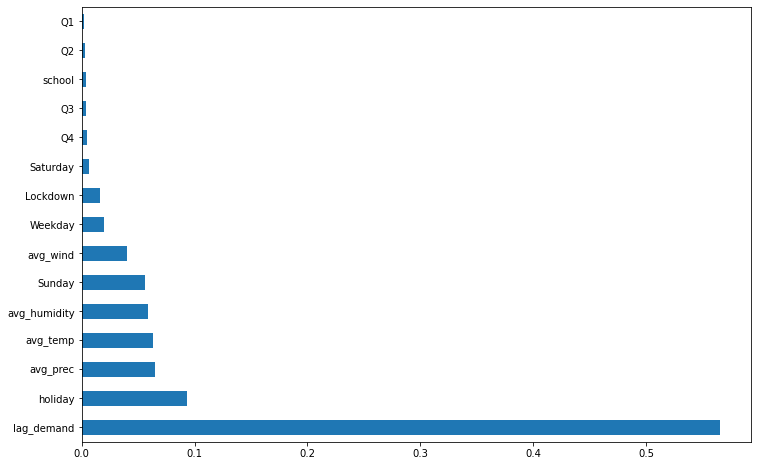

In [3]:
from sklearn.ensemble import RandomForestRegressor

selection = RandomForestRegressor()
selection.fit(X_train, y_train)

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=daily_data.columns[1:])
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [4]:
import numpy as np
from sklearn.metrics import r2_score

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def adj_r2(actual, pred, i):
    return 1 - ((1-r2_score(actual,pred))*(len(actual)-1)/(len(actual)-i-1))

In [5]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600]}

rf = RandomForestRegressor()

from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
for i in range(6,16):
    Xtrain_best = X_train[feat_importances.nlargest(i).index]
    rf_random.fit(Xtrain_best, y_train)
    Xtest_best = X_test[feat_importances.nlargest(i).index]
    
    y_pred= rf_random.predict(Xtest_best)

    y_pred_train = rf_random.predict(Xtrain_best)
    
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)



    from sklearn.metrics import r2_score
    print(i,"features: ")
    print(rf_random.best_params_)

    print("RMSE for test set is: ",(mse**(1/2)))
    print("RMSE for train set is: ", (mse_train**(1/2)))
    
    r2_adjtest = adj_r2(y_test, y_pred,i)
    r2_adjtrain = adj_r2(y_train, y_pred_train,i)
   
    print("Adjusted R2 score for test: ",r2_adjtest)
    print("Adjusted R2 score for training: ",r2_adjtrain)
    
    mape_test = mape(y_test, y_pred)
    mape_train = mape(y_train, y_pred_train)
    
   
    print("MAPE for test: ",mape_test)
    print("MAPE for training: ",mape_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.0min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


6 features: 
{'n_estimators': 1600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
RMSE for test set is:  1306.5412791925655
RMSE for train set is:  836.7827061567605
Adjusted R2 score for test:  0.6782163865921862
Adjusted R2 score for training:  0.8588109995401074
MAPE for test:  8.476469485815393
MAPE for training:  8.292950184265012
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


7 features: 
{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
RMSE for test set is:  1299.6599538334356
RMSE for train set is:  600.6684769722315
Adjusted R2 score for test:  0.6807826871049791
Adjusted R2 score for training:  0.9272021501268077
MAPE for test:  8.474200722137224
MAPE for training:  8.42527706532957
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


8 features: 
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
RMSE for test set is:  1202.176371193233
RMSE for train set is:  590.0002174312665
Adjusted R2 score for test:  0.7261734917190095
Adjusted R2 score for training:  0.9297208038420092
MAPE for test:  8.457543298734862
MAPE for training:  8.430818975318793
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.3min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


9 features: 
{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
RMSE for test set is:  1143.2034531009704
RMSE for train set is:  712.5843708902079
Adjusted R2 score for test:  0.7517431879865915
Adjusted R2 score for training:  0.8974185647012117
MAPE for test:  8.554768205775972
MAPE for training:  8.398777827619847
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 57.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 59.7min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


10 features: 
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
RMSE for test set is:  1141.442000063873
RMSE for train set is:  557.8050591443665
Adjusted R2 score for test:  0.7518697621014359
Adjusted R2 score for training:  0.9371022659228008
MAPE for test:  8.56732044674214
MAPE for training:  8.496916014224636
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


11 features: 
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
RMSE for test set is:  1150.609344131469
RMSE for train set is:  406.70511070646
Adjusted R2 score for test:  0.747216601426346
Adjusted R2 score for training:  0.9665417323293823
MAPE for test:  8.553920975916638
MAPE for training:  8.59289573312925
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


12 features: 
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
RMSE for test set is:  1136.9773567120783
RMSE for train set is:  411.049015115754
Adjusted R2 score for test:  0.7525314310697959
Adjusted R2 score for training:  0.9658016086474437
MAPE for test:  8.540873578956242
MAPE for training:  8.58318279728662
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


13 features: 
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
RMSE for test set is:  1133.417140628378
RMSE for train set is:  572.1922239780072
Adjusted R2 score for test:  0.7534400444457543
Adjusted R2 score for training:  0.9336903412852154
MAPE for test:  8.504866943141778
MAPE for training:  8.453177856698112
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


14 features: 
{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
RMSE for test set is:  1139.2823522935596
RMSE for train set is:  406.28583006879535
Adjusted R2 score for test:  0.7502328972572497
Adjusted R2 score for training:  0.9665473250594631
MAPE for test:  8.496748777450337
MAPE for training:  8.568677197263886
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.7min finished
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


15 features: 
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
RMSE for test set is:  1140.6115513955162
RMSE for train set is:  413.5150366747806
Adjusted R2 score for test:  0.7489960954284824
Adjusted R2 score for training:  0.9653243273199801
MAPE for test:  8.496969801445301
MAPE for training:  8.558066694541504


In [8]:
#Performs best when done with 13 features #but is OVERFIT!!

In [11]:

regressor = RandomForestRegressor(n_estimators= 1400, min_samples_split=5, 
                                  min_samples_leaf= 1, max_features='sqrt', max_depth = 30, bootstrap= True)

Xtrain_best = X_train[feat_importances.nlargest(13).index]
regressor.fit(Xtrain_best, y_train)
Xtest_best = X_test[feat_importances.nlargest(13).index]
    
y_pred= regressor.predict(Xtest_best)


    
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE for test set is: ",(mse**(1/2)))
  
r2_adjtest = adj_r2(y_test, y_pred,13)

   
print("Adjusted R2 score for test: ",r2_adjtest)

mape_test = mape(y_test, y_pred)

print("MAPE for test: ",mape_test)

<ipython-input-11-e374b4f59264>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(Xtrain_best, y_train)


RMSE for test set is:  1130.408891254331
Adjusted R2 score for test:  0.7547471175412795
MAPE for test:  8.508699750315238


<Figure size 1440x1440 with 0 Axes>

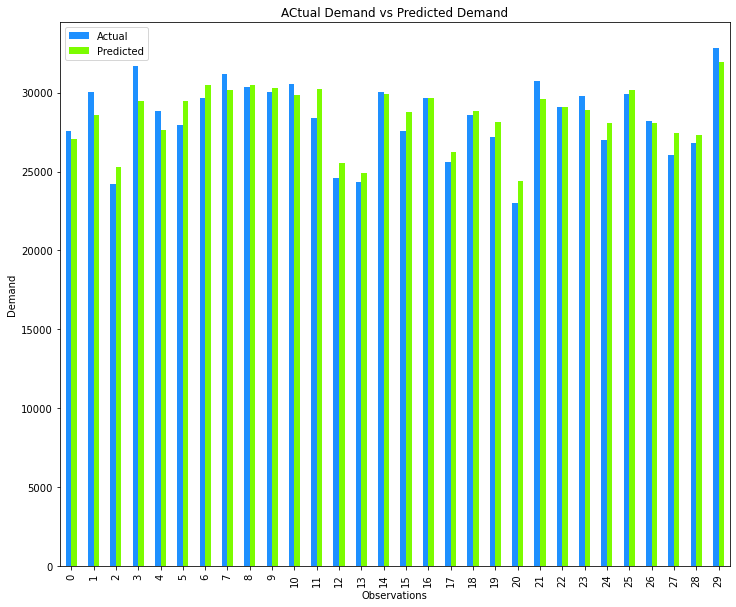

In [12]:
plt.figure(figsize= (20,20))
df = pd.concat([y_test, pd.DataFrame(y_pred)], axis = 1)
df.columns = {"Actual","Predicted"}

df.head(30).plot(kind='bar',figsize=(12,10),color = {"dodgerblue","lawngreen"})
plt.title("ACtual Demand vs Predicted Demand")
plt.xlabel("Observations")
plt.ylabel("Demand")
plt.show()